In [ ]:
import pandas as pd


df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')


print(df)

                                                                                                                                                                                                                                                                                                                                             komentar  \
0                                                                                                                                   <username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...   
1                                                                                                         <username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa?   kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan.  naturalisasi bia

# **Penjelasan Dataset yang Digunakan**

# 1. Kasus yang diambil

Analisis Sentimen (Classification)

# 2. Penjelasan setiap kolom



1.   Komentar = Berisi teks ulasan/komentar dari publik
2.   Label = Berisi label sentimen yang telah ditentukan (positif/negatif)



# 3. Import library

In [4]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\fahmianoor\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)

   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   --------------

In [66]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fahmianoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahmianoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fahmianoor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 4. Load data

**Membaca data**

In [67]:
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
print(df)

                                                                                                                                                                                                                                                                                                                                             komentar  \
0                                                                                                                                   <username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...   
1                                                                                                         <username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa?   kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan.  naturalisasi bia

# **Data Understanding**

# 1. Jumlah baris data

In [68]:
print(f"Jumlah Baris dan Kolom: {df.shape}")

Jumlah Baris dan Kolom: (398, 2)


# 2. Panjang rata-rata setiap baris

In [69]:
df['length'] = df['komentar'].apply(len)
panjang_rata_rata = df['length'].mean()
print(f"Panjang Rata-rata Komentar: {panjang_rata_rata:.2f} karakter")
print("-" * 35)

Panjang Rata-rata Komentar: 167.69 karakter
-----------------------------------


# 3. Cek data duplikasi

In [70]:
duplikasi = df.duplicated().sum()
print(f"Jumlah Data Duplikasi: {duplikasi}")

df[df.duplicated(keep=False)]

Jumlah Data Duplikasi: 4


,komentar,label,length
69,"<username> Udahalh juru kunci pasti ni timnas, emang aneh STY, pemain jadi camat di klub dipertahanin mulu, pemain cuma lari lari doang juga dibawa",negatif,147
73,<username> Dendy sama arhan punya aib nya sty kayanya nih,negatif,57
85,"<username> Udahalh juru kunci pasti ni timnas, emang aneh STY, pemain jadi camat di klub dipertahanin mulu, pemain cuma lari lari doang juga dibawa",negatif,147
88,<username> Dendy sama arhan punya aib nya sty kayanya nih,negatif,57
153,"<username> Dengan skuad rasa Eropa"" sepertinya taktik STY malah kurang cocok dengan gaya permainan liga Eropa ya. Bisa jadi STY akan diganti pelatih asal Eropa. Who knows? ðŸ˜Œ""",negatif,177
154,"<username> Dengan skuad rasa Eropa"" sepertinya taktik STY malah kurang cocok dengan gaya permainan liga Eropa ya. Bisa jadi STY akan diganti pelatih asal Eropa. Who knows? ðŸ˜Œ""",negatif,177
309,<username> <username> <username> Klo mnurut gw sih emg ada budaya sepak bola sih antara sty sm pemain naturalisasi..tp gw prcaya ini bakal jadi tmbh kaya pngalamannya sm gaya mainnya..lebih pasnya emg pressure yg dikasi ga ngotak sih..g ad trend positif yg dikasi dri publik ke mereka,positif,284
350,<username> <username> <username> Klo mnurut gw sih emg ada budaya sepak bola sih antara sty sm pemain naturalisasi..tp gw prcaya ini bakal jadi tmbh kaya pngalamannya sm gaya mainnya..lebih pasnya emg pressure yg dikasi ga ngotak sih..g ad trend positif yg dikasi dri publik ke mereka,positif,284


# 4. Cek data kosong

In [71]:
kosong = df.isnull().sum()
print("\nData Kosong (Missing Values):")
print(kosong)


Data Kosong (Missing Values):
komentar    0
label       0
length      0
dtype: int64


# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

**Perbandingan data positif dan data negatif**

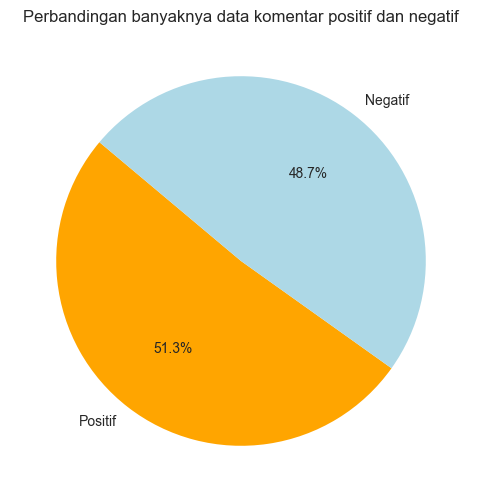

In [72]:
jumlah_komentar = df['label'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(jumlah_komentar, labels=['Positif', 'Negatif'], autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Perbandingan banyaknya data komentar positif dan negatif')
plt.show()

In [ ]:

import pandas as pd
from collections import Counter

komentar_positif = df[df['label'] == 'positif']['komentar']
komentar_negatif = df[df['label'] == 'negatif']['komentar']

kata_positif = Counter()
komentar_positif.apply(lambda x: kata_positif.update(x.split()))

kata_negatif = Counter()
komentar_negatif.apply(lambda x: kata_negatif.update(x.split()))


top_kata_positif = kata_positif.most_common(10)
top_kata_negatif = kata_negatif.most_common(10)

top_kata_positif_df = pd.DataFrame(top_kata_positif, columns=['Kata','Frekuensi'])
top_kata_negatif_df = pd.DataFrame(top_kata_negatif, columns=['Kata','Frekuensi'])

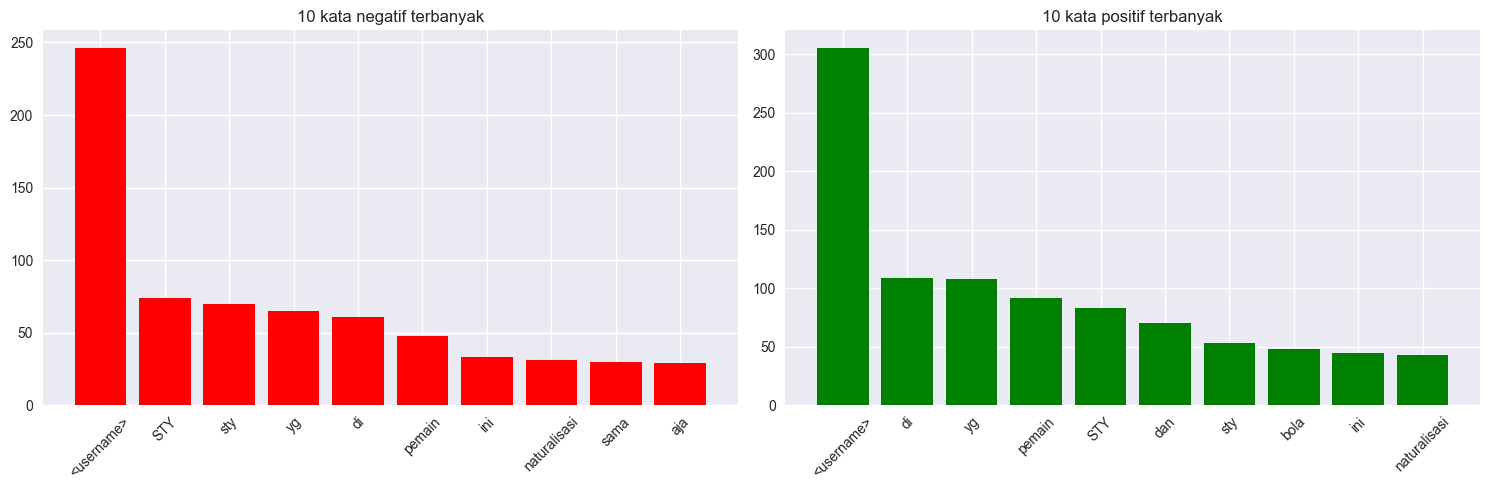

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(top_kata_negatif_df['Kata'], top_kata_negatif_df['Frekuensi'], color='red')
plt.title('10 kata negatif terbanyak')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_kata_positif_df['Kata'], top_kata_positif_df['Frekuensi'], color='green')
plt.title('10 kata positif terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
pip install Wordcloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahmianoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


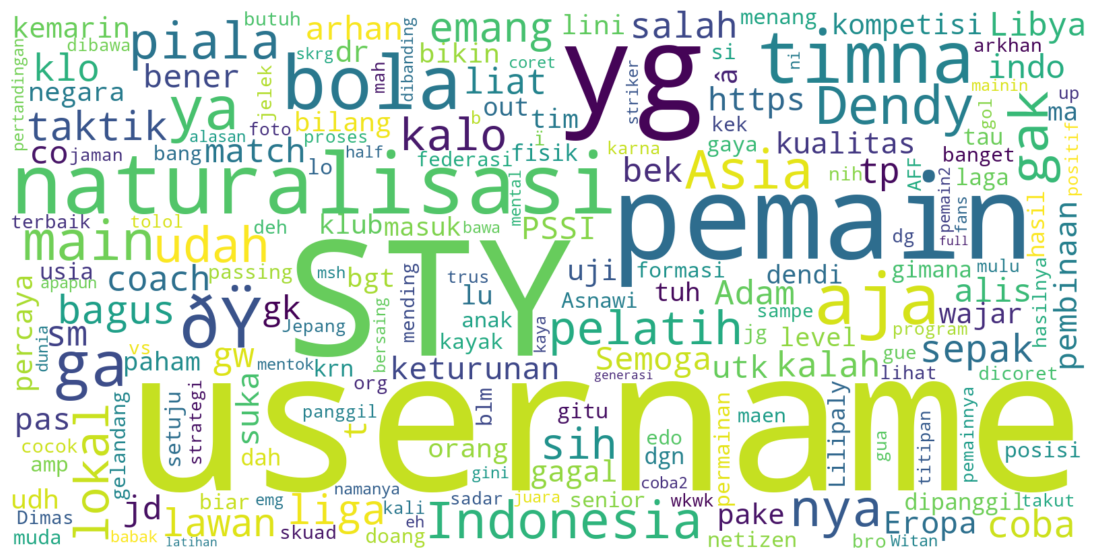

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

text = " ".join(df['komentar'].astype(str))

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=stop_words,
    max_words=200,
    collocations=False
).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

def basic_clean(text):
    text = text.lower()  
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

# buat kolom teks bersih dasar
df['clean_teks'] = df['komentar'].apply(basic_clean)

# **Data Text Processing**

In [ ]:

def basic_clean(text):
    text = text.lower() 
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

# buat kolom teks bersih dasar
df['clean_teks'] = df['komentar'].apply(basic_clean)

# 1. Tokenisasi

In [78]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_teks'].apply(lambda x: word_tokenize(x))
df['tokens'] = df['tokens'].apply(lambda x: [w for w in x if w != 'username'])
df[['komentar', 'clean_teks', 'tokens']].head()

,komentar,clean_teks,tokens
0,<username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...,username simulasi indonesia kembali dijajah keturunan belanda kedepan bye bye talenta anak bangsa lokal indonesia bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya,"[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]"
1,<username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa? kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan. naturalisasi biasa wajib bisa bahasa indonesia.,username username username keturunan lain yang gak main bola emang bisa di naturalisasi istimewa kepentingan negara itu sesuatu yg subjektif tergantung petingginya akal akalan naturalisasi biasa wajib bisa bahasa indonesia,"[keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]"
2,"<username> <username> uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing",username username uda botak keturunan penjajah sok si paling paham tentang bola lu coach mentok karir ngelatih futsal aja sok oke lu anjing,"[uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anjing]"
3,"<username> <username> <username> Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.",username username username belum tentu gak semuanya jadi pemain bola dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas kalau pssi cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri,"[belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timnas, kalau, pssi, cuma, fokus, ke, pemain, keturunan, mah, sama, aja, mempersempit, kolam, mereka, sendiri]"
4,<username> <username> <username> Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* nggak harus sama bego. Memang coach tolol sty tolol out aja udah,username username username lu nya aja yg bego makanya nonton sendiri tolol persepsi orang beda nggak harus sama bego memang coach tolol sty tolol out aja udah,"[lu, nya, aja, yg, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, nggak, harus, sama, bego, memang, coach, tolol, sty, tolol, out, aja, udah]"


In [79]:
df['text'] = (
    df['komentar']
    .str.replace(r'<username>', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)


In [80]:
print(df['tokens'])

0                                                                                                                       [simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]
1                                                                                                                 [keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]
2                                                                                                                                                                                                 [uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke

# 2. Stopword removal

In [ ]:
stop_words = set(stopwords.words('indonesian'))

def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = re.sub(r'\d+', '', word)  
        word = word.translate(str.maketrans('', '', string.punctuation))  
        if word and word.lower() not in stop_words:
            cleaned.append(word.lower())
    return cleaned

df['cleaned'] = df['tokens'].apply(clean_tokens)

# 3. Text Normalization

In [84]:
normalisasi_kamus = {
   "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "uda": "sudah",
    "udah": "sudah",
    "bgt": "banget",
    "bener": "benar",
    "bener2": "benar-benar",
    "jg": "juga",
    "aja": "saja",
    "kok": "mengapa",
    "tp": "tapi",
    "krn": "karena",
    "yg": "yang",
    "dlm": "dalam",
    "blm": "belum",
    "dgn": "dengan",
    "trus": "terus",
    "sm": "sama",
    "kalo": "kalau",
    "kl": "kalau",
    "pls": "tolong",
   "lu": "kamu",
   "drpd" : "daripada",
   "emang" : "memang",
   "ngelatih" : "melatih",
   "mah":"",
   "tpi":"tapi",
   "mna":"mana",
   "tiap":"setiap",
   "pildun":"piala dunia",
   "korsel":"korea selatan",
   "mh":"",
   "beneerr":"benar",
   "timnas":"tim nasional",
   "mksd":"maksud",
   "skrng":"sekarang",
   "klo":"kalau",
   "tgl":"tanggal",
   "taun":"tahun",
   "bnyak":"banyak",
   "gaada":"tidak ada",
   "dh":"sudah",
   "jgn":"jangan",
   "ngingetin:" : "mengingatkan",
"pula" :"juga",
"bgst":"bangsat",
"rek":"teman", 
"yaampun":"ya ampun",
"teross":"terus",
"ngira":"mengira",
"dn":"dan",
"x":"kali",
"mrk":"mereka",
"gue":"saya",
"ne":"ini",
"biar":"supaya",
"ma":"mau",
"nyimpen":"menyimpan",
"dimainin":"dimainkan",
"itu":"itu",
"agak":"sedikit",
"laen":"lain",
"lo":"kamu",
"nanya":"menanya",
"un":"",
"wkwk":"",
"coy":"",
"ngebut":"cepat",
"berak":"buang air besar",
"sampe":"sampai",
"sikon":"situasi",
"mulu":"terus",
"poto":"foto",
"di":"di",
"bawak":"bawa",
"sunge": "sungai",
  "ni": "ini",
  "atlit": "atlet",
  "keknya": "sepertinya",
  "naikan": "menaikkan",
  "nyoret": "mencoret",
  "liat": "melihat",
  "kyknya": "sepertinya",
  "bikin": "membuat",
  "nyiapin": "menyiapkan",
  "ttg": "tentang",
  "denial": "menampik",
  "kntl": "",
  "mainin": "memainkan",
  "kagak": "tidak",
  "lgi": "lagi",
  "tau": "tahu",
  "maen": "main",
  "njirr": "",
  "gw": "saya",
  "ngerti": "mengerti",
  "skrg": "sekarang",
  "engga": "tidak",
  "bgt": "banget",
  "banget": "sekali",
  "bkl": "bakal",
  "dh": "sudah",
  "sbtulnya": "sebetulnya",
  "dr": "dari",
  "sbnrnya": "sebenarnya",
  "phs": "pas",
  "pake": "pakai",
  "w": "saya",
  "timnasional": "tim nasional",
  "dirtek": "",
  "nga": "tidak",
  "ndasmu": "",
  "thn": "tahun",
  "belummemberi": "belum memberi",
  "timna": "tim nasional",
  "diliat": "dilihat",
  "nemu": "menemukan",
  "krn": "karena",
  "gtu2": "begitu-begitu",
  "llu": "lalu",
  "dpt": "dapat",
  "ngakunya": "mengaku",
  "klean": "kalian",
  "aq": "aku",
  "seklas": "sekelas"

}

def normalize_text(tokens):
    return [normalisasi_kamus.get(t, t) for t in tokens]

df['normalized'] = df['tokens'].apply(normalize_text)
df[['komentar', 'tokens', 'normalized']].head(30)

,komentar,tokens,normalized
0,<username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...,"[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]","[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, daripada, rusak, mental, anak, bangsanya]"
1,<username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa? kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan. naturalisasi biasa wajib bisa bahasa indonesia.,"[keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]","[keturunan, lain, yang, tidak, main, bola, memang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yang, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]"
2,"<username> <username> uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing","[uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anjing]","[sudah, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, kamu, coach, mentok, karir, melatih, futsal, saja, sok, oke, kamu, anjing]"
3,"<username> <username> <username> Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.","[belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timnas, kalau, pssi, cuma, fokus, ke, pemain, keturunan, mah, sama, aja, mempersempit, kolam, mereka, sendiri]","[belum, tentu, tidak, semuanya, jadi, pemain, bola, dan, yang, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, tim nasional, kalau, pssi, cuma, fokus, ke, pemain, keturunan, , sama, saja, mempersempit, kolam, mereka, sendiri]"
4,<username> <username> <username> Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* nggak harus sama bego. Memang coach tolol sty tolol out aja udah,"[lu, nya, aja, yg, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, nggak, harus, sama, bego, memang, coach, tolol, sty, tolol, out, aja, udah]","[kamu, nya, saja, yang, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, tidak, harus, sama, bego, memang, coach, tolol, sty, tolol, out, saja, sudah]"
5,"<username> Saya punya saran kepada <username> <username> <username> kita terkenal dengan pola permainan yang cepat jika itu dihilangkan maka itu bahaya besar dalam persepak bolaan kita,. Jadi mohon disampaikan ke <username>. Ini ciri khas permainan kita!!!","[saya, punya, saran, kepada, kita, terkenal, dengan, pola, permainan, yang, cepat, jika, itu, dihilangkan, maka, itu, bahaya, besar, dalam, persepak, bolaan, kita, jadi, mohon, disampaikan, ke, ini, ciri, khas, permainan, kita]","[saya, punya, saran, kepada, kita, terkenal, dengan, pola, permainan, yang, cepat, jika, itu, dihilangkan, maka, itu, bahaya, besar, dalam, persepak, bolaan, kita, jadi, mohon, disampaikan, ke, ini, ciri, khas, permainan, kita]"
6,Ini STY ga coba asnawi jadi gelandang aja? VO2 max nya paling tinggi loh diantara pemain timnas.,"[ini, sty, ga, coba, asnawi, jadi, gelandang, aja, vo, max, nya, paling, tinggi, loh, 

# 4. Lemmatization

In [85]:
lemmatizer = WordNetLemmatizer()

In [86]:
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])
df[['komentar', 'lemmatized']].head()

,komentar,lemmatized
0,<username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...,"[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]"
1,<username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa? kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan. naturalisasi biasa wajib bisa bahasa indonesia.,"[keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]"
2,"<username> <username> uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing","[uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anjing]"
3,"<username> <username> <username> Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.","[belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timnas, kalau, pssi, cuma, fokus, ke, pemain, keturunan, mah, sama, aja, mempersempit, kolam, mereka, sendiri]"
4,<username> <username> <username> Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* nggak harus sama bego. Memang coach tolol sty tolol out aja udah,"[lu, nya, aja, yg, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, nggak, harus, sama, bego, memang, coach, tolol, sty, tolol, out, aja, udah]"


# 5. Stemming

In [87]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['stemmed'] = df['lemmatized'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
df[['lemmatized', 'stemmed']].head()

,lemmatized,stemmed
0,"[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]","[simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]"
1,"[keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]","[keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]"
2,"[uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anjing]","[uda, botak, keturunan, penjajah, sok, si, pale, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anj]"
3,"[belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timnas, kalau, pssi, cuma, fokus, ke, pemain, keturunan, mah, sama, aja, mempersempit, kolam, mereka, sendiri]","[belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timna, kalau, pssi, cuma, foku, ke, pemain, keturunan, mah, sama, aja, mempersempit, kolam, mereka, sendiri]"
4,"[lu, nya, aja, yg, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, nggak, harus, sama, bego, memang, coach, tolol, sty, tolol, out, aja, udah]","[lu, nya, aja, yg, bego, makanya, nonton, sendiri, tolol, persepsi, orang, beda, nggak, haru, sama, bego, memang, coach, tolol, sti, tolol, out, aja, udah]"


# 6. Matrix correlation

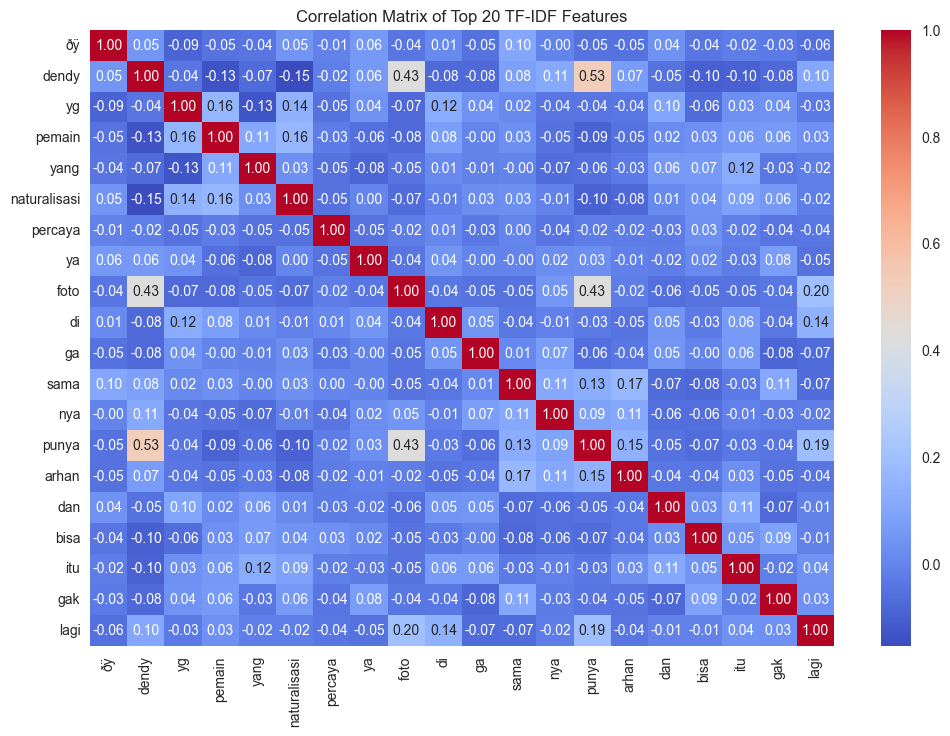

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

top_features = tfidf_df.var().sort_values(ascending=False).head(20).index

corr_matrix = tfidf_df[top_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 20 TF-IDF Features")
plt.show()


#7. Labeling data (lexicon)

In [90]:
positif = ["bagus", "keren", "hebat", "juara", "menang", "mantap", "baik", "unggul"]
negatif = ["jelek", "buruk", "kalah", "parah", "lemah", "kecewa", "payah", "jatuh"]
negasi = ["tidak", "bukan", "kurang"]

def get_sentiment(tokens):
    score = 0
    for i, t in enumerate(tokens):
        if t in positif:
            if i > 0 and tokens[i-1] in negasi:
                score -= 1   # efek negasi
            else:
                score += 1
        elif t in negatif:
            if i > 0 and tokens[i-1] in negasi:
                score += 1   # negasi membalik
            else:
                score -= 1

    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"


df['text'] = (
    df['komentar']
    .str.replace(r'<username>', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

df['label_auto'] = df['normalized'].apply(get_sentiment)
df[['text', 'label_auto']].head(30)

,text,label_auto
0,Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...,positif
1,keturunan lain yang gak main bola emang bisa di naturalisasi istimewa? kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan. naturalisasi biasa wajib bisa bahasa indonesia.,netral
2,"uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing",netral
3,"Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.",netral
4,Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* nggak harus sama bego. Memang coach tolol sty tolol out aja udah,netral
5,"Saya punya saran kepada kita terkenal dengan pola permainan yang cepat jika itu dihilangkan maka itu bahaya besar dalam persepak bolaan kita,. Jadi mohon disampaikan ke . Ini ciri khas permainan kita!!!",netral
6,Ini STY ga coba asnawi jadi gelandang aja? VO2 max nya paling tinggi loh diantara pemain timnas.,netral
7,"Bukan masalah bnyak kesempatan, tiap taun juga bnyak turnament sebenernya, tpi gua rasa ini salah satu hajat besar pssi, tiap taun cuman bersaing di level asia tenggara. Di piala asia inilah kredibilitas ET/STY di pertaruhkan. Klo pildun mah merem dh jngn ketinggian ekspetasinya.",netral
8,"Biasa, sty klo tantrum kan gtu. Semua hal dibawaÂ², mna gaada yg ngingetin pulaa.",netral
9,Setelah pulang ke tanah air apakah akan dilempari telur juga layak nya timnas Korsel yg gagal di era sty ðŸ¥²ðŸ¥²ðŸ¥²,netral


In [91]:
pd.set_option('display.max_colwidth', None)

print(df[['komentar']])

                                                                                                                                                                                                                                                                                                                                             komentar
0                                                                                                                                   <username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...
1                                                                                                         <username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa?   kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan.  naturalisasi biasa waj

# 8. Text vektorisasi (TF-IDF)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['normalized'].apply(lambda x: ' '.join(x)))
y = df['label_auto']   # atau df['label'] jika kamu sudah punya label asli

# 9. Data splitting dengan skala (80:20)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (318, 2428)
Ukuran data uji: (80, 2428)


# **Data modelling**

# 1. Melatih model logistic regresion

Model yang digunakan pada tahap ini adalah Logistic Regression,
yaitu salah satu algoritma machine learning supervised yang umum digunakan untuk klasifikasi teks, termasuk analisis sentimen.

Berdasarkan hasil pelatihan, model Logistic Regression dipilih karena memiliki tingkat akurasi yang baik, stabil pada data teks berukuran kecil hingga menengah, serta mudah diimplementasikan menggunakan pustaka scikit-learn.

In [94]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
model = LogisticRegression(max_iter=200)

# Latih model dengan data training
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# **Data evaluasi**

# 1. Confussion matrix

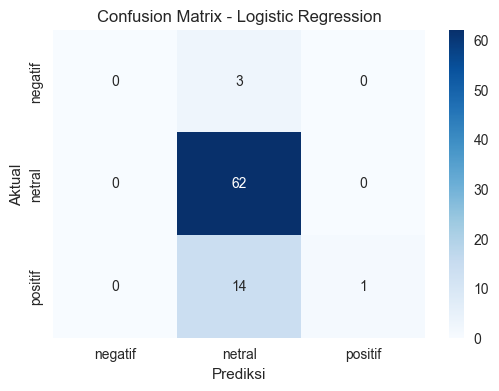

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi label untuk data uji
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 2. Laporan klasifikasi

In [96]:
from sklearn.metrics import accuracy_score, classification_report

# Akurasi model
akurasi = accuracy_score(y_test, y_pred)
print(f"🔹 Akurasi Model: {akurasi:.2f}")

# Laporan klasifikasi (Precision, Recall, F1-score)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

🔹 Akurasi Model: 0.79

🔹 Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         3
      netral       0.78      1.00      0.88        62
     positif       1.00      0.07      0.12        15

    accuracy                           0.79        80
   macro avg       0.59      0.36      0.33        80
weighted avg       0.80      0.79      0.70        80



c:\Users\fahmianoor\miniconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\fahmianoor\miniconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\fahmianoor\miniconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [97]:
print(df['tokens'].head())

0                                      [simulasi, indonesia, kembali, dijajah, keturunan, belanda, kedepan, bye, bye, talenta, anak, bangsa, lokal, indonesia, bubarkan, liga, dan, pencarian, bibit, unggul, atlet, bola, drpd, rusak, mental, anak, bangsanya]
1                                [keturunan, lain, yang, gak, main, bola, emang, bisa, di, naturalisasi, istimewa, kepentingan, negara, itu, sesuatu, yg, subjektif, tergantung, petingginya, akal, akalan, naturalisasi, biasa, wajib, bisa, bahasa, indonesia]
2                                                                                                                [uda, botak, keturunan, penjajah, sok, si, paling, paham, tentang, bola, lu, coach, mentok, karir, ngelatih, futsal, aja, sok, oke, lu, anjing]
3    [belum, tentu, gak, semuanya, jadi, pemain, bola, dan, yg, milih, karir, sebagai, pemain, bola, pun, belum, tentu, kualitasnya, cukup, buat, timnas, kalau, pssi, cuma, fokus, ke, pemain, keturunan, mah, sama, aja, mempersemp

# **Data prediksi**

In [99]:
# Contoh beberapa teks baru untuk diuji
data_baru = [
    "Timnas Indonesia bermain sangat bagus dan solid!",
    "Permainannya membosankan, banyak kesalahan sendiri.",
    "Pelatih membuat strategi yang cukup baik meski belum maksimal."
]

# Ubah teks baru menjadi bentuk vektor (harus sama seperti proses training)
data_baru_tfidf = vectorizer.transform(data_baru)

# Lakukan prediksi dengan model yang sudah dilatih
prediksi = model.predict(data_baru_tfidf)

# Tampilkan hasil
for teks, label in zip(data_baru, prediksi):
    print(f"Teks: {teks}")
    print(f"Prediksi Sentimen: {label}")
    print("-" * 60)

Teks: Timnas Indonesia bermain sangat bagus dan solid!
Prediksi Sentimen: netral
------------------------------------------------------------
Teks: Permainannya membosankan, banyak kesalahan sendiri.
Prediksi Sentimen: netral
------------------------------------------------------------
Teks: Pelatih membuat strategi yang cukup baik meski belum maksimal.
Prediksi Sentimen: netral
------------------------------------------------------------


# Exploratory Data Analysis (EDA)

**Menganalisa contoh komentar positif dan negatif**

In [103]:
df['text'] = (
    df['komentar']
    .str.replace(r'<username>', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

for i in range(1,11):
    print('email #', i)
    komentar_positif = df[df['label'] == 'positif']['text'].iloc[i]
    print(komentar_positif + '\n')

email # 1
Indonesia 0-2 Libya (STY pasti berbenah baik taktik &amp susunan pemain. Tapi Libya sepertinya masih akan unggul) #strategibola #Tebakskor #indonesia #libya

email # 2
Suka tidak suka Coach STY lah yang berhasil membawa gairah positif untuk timnas level senior. Karena Sejak evan dimas cs berhasil juala aff u19 orang2 cenderung lebih mengikuti timnas level junior ketimbang senior karena peforma timnas senior yang waktu itu jelek.

email # 3
Yang paling kerja keras tinggi menurut sty itu kalau lokal ada 2 pemain..asnawi dan pratama arhan. Dia sering bikin contoh 2 pemain itu ketika ngelatih timnas kelompok umur. Arhan pas masih sering main emang gg..salah pilih klub aja dia

email # 4
Salah satu alasan juga knp klub2 korea ttp ngelirik Asnawi, krn dari data statistik mereka pasti Asnawi msh terhitung bagus buat standar kuota pemain asing, bukan masalah koneksi STY dll. Arhan juga trmasuk kategori ini.

email # 5
Tolonglah, sty ngelath dri rank 170an, dan tekhnik pasing operan d

Dari 10 contoh yang diberikan, dapat dilihat bahwa komentar dengan sentimen positif ditandai dengan rasa kepercayaan yang tinggi kepada pelatih, apresiasi pencapaian pelatih, kekaguman terhadap pelatih, serta terkesan membela timnas yang dilatih oleh STY.

In [105]:
for i in range(1,11):
    print('email #', i)
    komentar_negatif = df[df['label'] == 'negatif']['text'].iloc[i]
    print(komentar_negatif + '\n')

email # 1
keturunan lain yang gak main bola emang bisa di naturalisasi istimewa? kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan. naturalisasi biasa wajib bisa bahasa indonesia.

email # 2
uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing

email # 3
Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.

email # 4
Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* nggak harus sama bego. Memang coach tolol sty tolol out aja udah

email # 5
Saya punya saran kepada kita terkenal dengan pola permainan yang cepat jika itu dihilangkan maka itu bahaya besar dalam persepak bolaan kita,. Jadi mohon disampaikan ke . Ini ciri khas permainan kita!!!

email # 6
Ini STY ga coba asnawi jadi gelandang aja? VO2 max n

Dari 10 contoh komentar negatif, dapat dilihat bahwa komentar bersentimen negatif mengandung kata-kata kasar, terkesan tidak percaya strategi pelatih, mempermasalahkan pemain keturunan (atau naturalisasi), dan tidak jarang meminta pelatih STY untuk tidak melatih timnas.